In [63]:
#import ....
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt  
from matplotlib import cm
import pandas as pd
import numpy as np
food =  pd.read_csv("food_nutrient_2011_13_AHS.csv", header=0,low_memory=False)
foodcopy=pd.read_csv("food_nutrient_2011_13_AHS.csv", header=0,low_memory=False)

In [64]:
#Question 1
print('*'*3)
print("Q1")
#use 'shape' function to get the dimention of this dataframe
print("Number of foods:", food.shape[0])
print("Number of attributes:", food.shape[1])
print('\n')
print(food.dtypes)
print('*'*3)

***
Q1
Number of foods: 5740
Number of attributes: 57


Food ID                                                object
Survey ID                                               int64
Food Name                                              object
Survey flag                                            object
Energy, with dietary fibre (kJ)                         int64
Energy, without dietary fibre (kJ)                      int64
Moisture (g)                                          float64
Protein (g)                                           float64
Total fat (g)                                         float64
Available carbohydrates, with sugar alcohols (g)      float64
Available carbohydrates, without sugar alcohol (g)    float64
Starch (g)                                            float64
Total sugars (g)                                      float64
Added sugars (g)                                      float64
Free sugars (g)                                       float64
Dietary fibre 

In [65]:
#Question 2
print('*'*3)
print("Q2")
print("Median value of Magnesium:", round(food.loc[: , "Magnesium (Mg) (mg)"].median(), 1), 'g')
print("Mean value of Moisture:", round(food.loc[: , "Moisture (g)"].mean(), 1), 'g')
#use loc[] function to get the specific columns 
print('*'*3)

***
Q2
Median value of Magnesium: 22.0 g
Mean value of Moisture: 56.3 g
***


In [66]:
#Question 3

# Part a
survey = food.loc[:, 'Survey ID']
#use loc[] to get the 'Survey ID' column, then use astype() function to change its type to string
surveystr = survey.astype('str')
food["Survey ID"] = surveystr

# Part b
surveyseries = pd.Series(surveystr)
category = surveyseries.str.slice(stop=2)
#get the value which need to be stored in the new column "Food category"
food["Food category"] = category


# Part c
category = food['Food category'].value_counts()
#find the number of records in each different food categories 
print('*'*3)
print("Q3")
print('% of foods which are Cereal based products and dishes (Food category 13)  =', round(category['13']/food.shape[0]*100, 1))
print('*'*3)

***
Q3
% of foods which are Cereal based products and dishes (Food category 13)  = 15.9
***


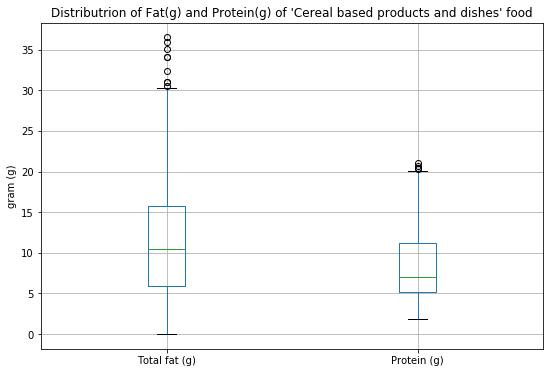

In [67]:
#Question 4
data = food.loc[:,["Total fat (g)","Protein (g)",'Food category']]
#use loc[] to get the columns which will be use
cerealdata = data[data["Food category"]=='13']
#retrive the records which with food category '13'
plt.figure(figsize=(9,6))
cerealdata.boxplot()
plt.ylabel('gram (g)')
plt.title("Distributrion of Fat(g) and Protein(g) of 'Cereal based products and dishes' food")
plt.show()

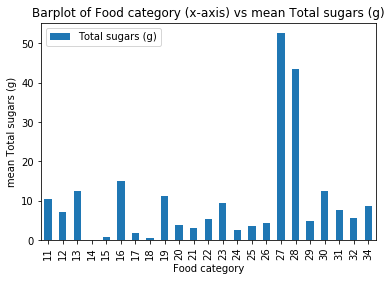

In [68]:
#Question 5
sugars = food.loc[:,['Food category', 'Total sugars (g)']]
#take column "Food category" and "Total sugars (s)"
groupedsugar = sugars.groupby(["Food category"]).mean()
#group data by their food category and show the mean of their 'Total sugars (s)'
groupedsugar.plot.bar()
plt.title("Barplot of Food category (x-axis) vs mean Total sugars (g)")
plt.ylabel("mean Total sugars (g)")
plt.show()

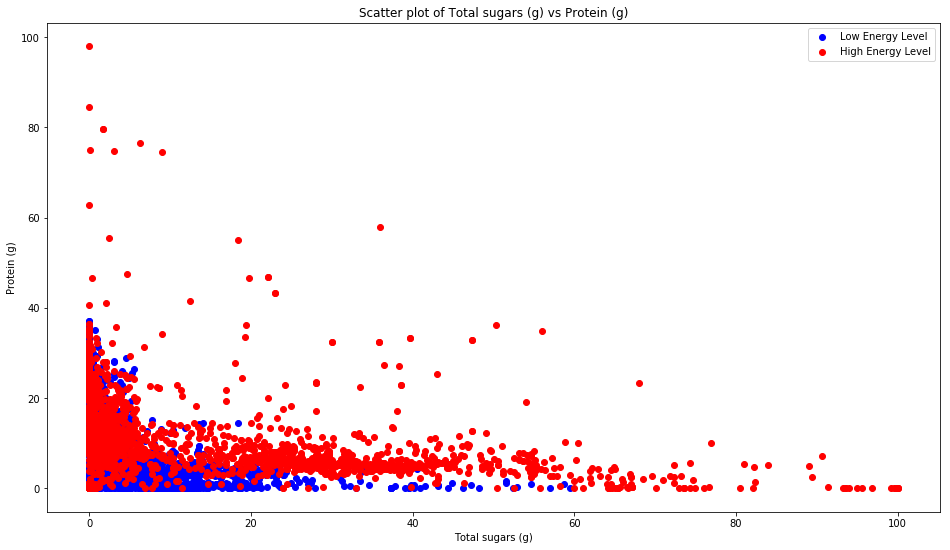

In [69]:
#Question 6

#Part a
food['EnergyLevel'] = np.where(food['Energy, with dietary fibre (kJ)']>1000, '1', '0')

#Part b
plotdata = food.loc[:,['Total sugars (g)','Protein (g)','EnergyLevel']]
#retrive the data for scatter plot 
low = plotdata[plotdata["EnergyLevel"]=='0']
#create a dataframe with data that have '0' energy level
high = plotdata[plotdata["EnergyLevel"]=='1']
#create a dataframe with data that have '1' energy level
plt.figure(figsize=(16,9))
plt.scatter(low.iloc[:,0], low.iloc[:,1], color='blue')
#set blue color for those who has '0' energy level
plt.scatter(high.iloc[:,0], high.iloc[:,1], color='red')
#set red color for those who has '1' energy level
plt.xlabel("Total sugars (g)")
plt.ylabel("Protein (g)")
plt.legend(['Low Energy Level', 'High Energy Level'])
plt.title("Scatter plot of Total sugars (g) vs Protein (g)")

plt.show()

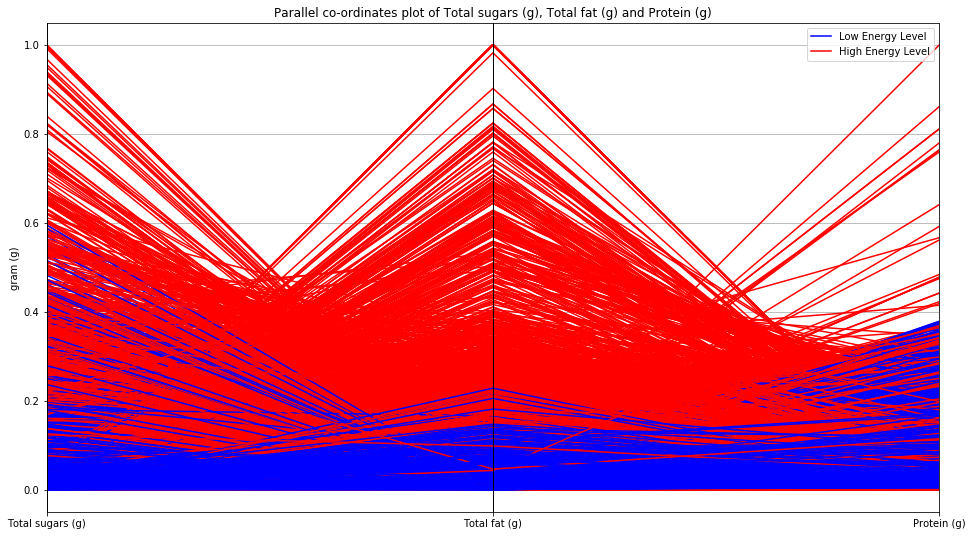

In [70]:
#Question 7

#Part a
food['Protein (g)'] = (food['Protein (g)']-food['Protein (g)'].min())/(food['Protein (g)'].max()-food['Protein (g)'].min())
food['Total fat (g)'] = (food['Total fat (g)']-food['Total fat (g)'].min())/(food['Total fat (g)'].max()-food['Total fat (g)'].min())
food['Total sugars (g)'] = (food['Total sugars (g)']-food['Total sugars (g)'].min())/(food['Total sugars (g)'].max()-food['Total sugars (g)'].min())

#Part b
plt.figure(figsize=(16,9))
parallel_coordinates(food[['Total sugars (g)', 'Total fat (g)','Protein (g)', 'EnergyLevel']], 'EnergyLevel', color=['b', 'r'])
plt.legend(['Low Energy Level', 'High Energy Level'])
plt.title('Parallel co-ordinates plot of Total sugars (g), Total fat (g) and Protein (g)')
plt.ylabel('gram (g)')
plt.show()

***
Q8


1 . Dripping, beef 900.8
2 . Fat, solid, vegetable oil based 900.8
3 . Shortening, commercial, animal fat (for short pastry, pie bases, tarts and flans) 900.8
4 . Lard 900.8
5 . Ghee, clarified butter 900.3
***


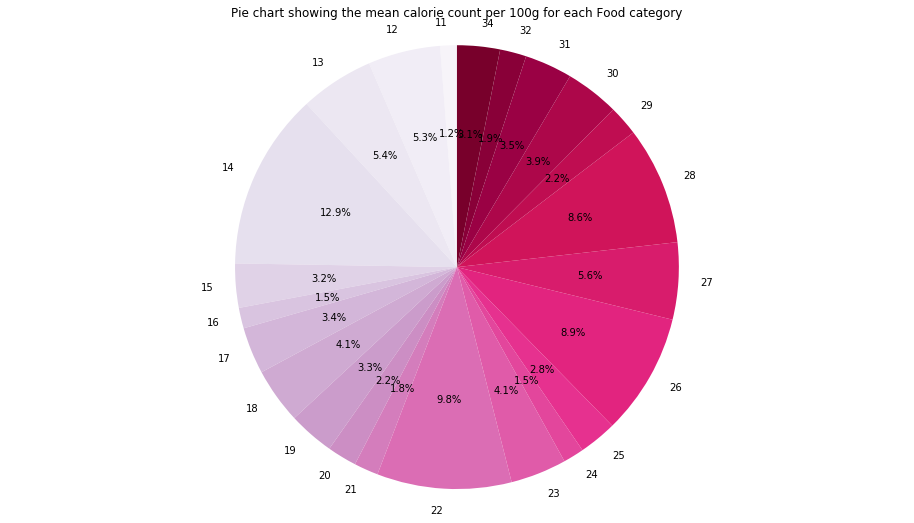

In [71]:
#Question 8


#Part a
calorie = round(4*foodcopy['Protein (g)'] + 4*foodcopy['Available carbohydrates, with sugar alcohols (g)'] + 9*foodcopy['Total fat (g)'] + 7*foodcopy['Alcohol (g)'], 1)
food['calorie count per 100g'] = calorie

#Part b
caloriesort = food.sort_values('calorie count per 100g', ascending=False)
#first sort the whole table by calorie count per 100g in descending order
top = caloriesort.head(n=5)
#retrive the highest 5 food
top5 = top.loc[:,["Food Name", 'calorie count per 100g']]
#locate the food name and calorie count for top 5 food
print('*'*3)
print("Q8")
print('\n')
for i in range(0, len(top5.values)):
    print(i+1, '.', list(top5["Food Name"])[i], list(top5["calorie count per 100g"])[i])
print('*'*3)

#Part c
caloriedata = food.loc[:, ['Food category', 'calorie count per 100g']]
#retrive the data which will be used for pie chart
caloriegroup = caloriedata.groupby(["Food category"]).mean()
#calculate the mean calorie count per 100g for each food category
label = caloriegroup.index
#set the label of pie chart as the food category
size = caloriegroup['calorie count per 100g']
#set the size of pie chart as the percentage number listing its relative calorie size
color=cm.PuRd(np.arange(len(label))/len(label))
#from colormap to assign different colors to each slices
plt.figure(figsize=(16,9))
plt.pie(size, labels=label, colors=color, autopct='%1.1f%%', startangle = 90)
plt.title('Pie chart showing the mean calorie count per 100g for each Food category')
plt.axis('equal')
plt.show()


In [72]:
#Question 9


#Part a
health =  pd.read_csv("8i. Australian Health Survey Classification System.csv", header=0,low_memory=False)
#convert csv file into dataframe
healthdata = health.rename(index=str, columns={'Food Group Code':'Food category'})
#change the colume name of "Food Group Code" into "Food category" so that it can be matched with "food" dataframe
code = healthdata.loc[:, 'Food category']
codestr = code.astype('str')
healthdata['Food category']=codestr
#change the data type of 'Food category' column from int to string, so that two dataframe can be merged
groupname= pd.merge(food, healthdata, on='Food category', how='left')
#left join two dataframe
foodname=groupname.rename(index=str, columns={"Food Group and Sub-Group Name":"Food category name"})
foodname

#Part b
sugarvalue=list(foodcopy['Total sugars (g)'])
foodname["Sugars(g)"]=sugarvalue
#append the original value of total sugars
sugargroup=foodname.loc[:,['Sugars(g)', "Food category name"]]
#retrive the data which will be used 
sugardata=sugargroup.groupby(["Food category name"]).mean()
#group the data by food category name and calculate the mean sugar respectively 
decimal=round(sugardata["Sugars(g)"], 1)
#round the figure to one decimal place
sugardata["Sugars(g)"]=decimal
sugardata.rename(columns={'Sugars(g)':'Mean total sugars (g) by category'}, inplace=True)
#rename the column "Total sugars (g)" into "Mean total sugars (g) by category"
import json
jsonformat=sugardata.to_json(orient='columns')
final=json.loads(jsonformat)
final


{'Mean total sugars (g) by category': {'Alcoholic beverages': 4.9,
  'Cereal based products and dishes': 12.5,
  'Cereals and cereal products': 7.1,
  'Confectionery and cereal/nut/fruit/seed bars': 43.5,
  'Dairy & meat substitutes': 3.7,
  'Egg products and dishes': 1.9,
  'Fats and oils': 0.1,
  'Fish and seafood products and dishes': 0.8,
  'Fruit products and dishes': 14.9,
  'Infant formulae and foods': 5.6,
  'Legume and pulse products and dishes': 3.7,
  'Meat, poultry and game products and dishes ': 0.5,
  'Milk products and dishes': 11.1,
  'Miscellaneous': 7.6,
  'Non-alcoholic beverages': 10.4,
  'Reptiles, amphibia and insects': 8.7,
  'Savoury sauces and condiments': 9.5,
  'Seed and nut products and dishes': 5.4,
  'Snack foods': 4.5,
  'Soup': 3.2,
  'Special dietary foods': 12.5,
  'Sugar products and dishes': 52.6,
  'Vegetable products and dishes': 2.5}}